In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

sns.set_theme(style="darkgrid")
sns.set_context("paper")

In [6]:
dfr = pd.read_csv('Data/multilayer_results.csv')

In [7]:
dfr = dfr.groupby(by='model').agg({'mean'}).reset_index()

dfr.columns = dfr.columns.droplevel(1)

dfr

,model,seconds,trainingacc,valacc
0,model0,13.150347,0.874075,0.860821
1,model2,13.489426,0.944857,0.862075
2,model2_dropout,15.393595,0.892642,0.880476
3,model2_reg,15.207894,0.855171,0.863862
4,model3,17.971869,0.976251,0.847120
5,model4,13.830466,0.958486,0.856218


In [60]:
def createencoding(series, model, d=0):
    """
    Helper function for the target variable
    """
    if d==0:
        conditions = [ ( model == 'model2_dropout' ) ]

        choices = [ 0 ]
    else:
        conditions = [ ( model != 'model2_dropout' ) ]

        choices = [ 0 ]
    
    out = np.select(conditions, choices, default = series)
    
    return out

In [61]:
dfr['Training_without'] = createencoding(dfr.trainingacc, dfr.model)
dfr['Training_with'] = createencoding(dfr.trainingacc, dfr.model, 1)

dfr['Val_without'] = createencoding(dfr.valacc, dfr.model)
dfr['Val_with'] = createencoding(dfr.valacc, dfr.model, 1)

dfr

,model,seconds,trainingacc,valacc,Training_without,Training_with,Val_without,Val_with
0,model0,13.150347,0.874075,0.860821,0.874075,0.000000,0.860821,0.000000
1,model2,13.489426,0.944857,0.862075,0.944857,0.000000,0.862075,0.000000
2,model2_dropout,15.393595,0.892642,0.880476,0.000000,0.892642,0.000000,0.880476
3,model2_reg,15.207894,0.855171,0.863862,0.855171,0.000000,0.863862,0.000000
4,model3,17.971869,0.976251,0.847120,0.976251,0.000000,0.847120,0.000000
5,model4,13.830466,0.958486,0.856218,0.958486,0.000000,0.856218,0.000000


Text(132.7, 0.5, 'Time(seconds)')

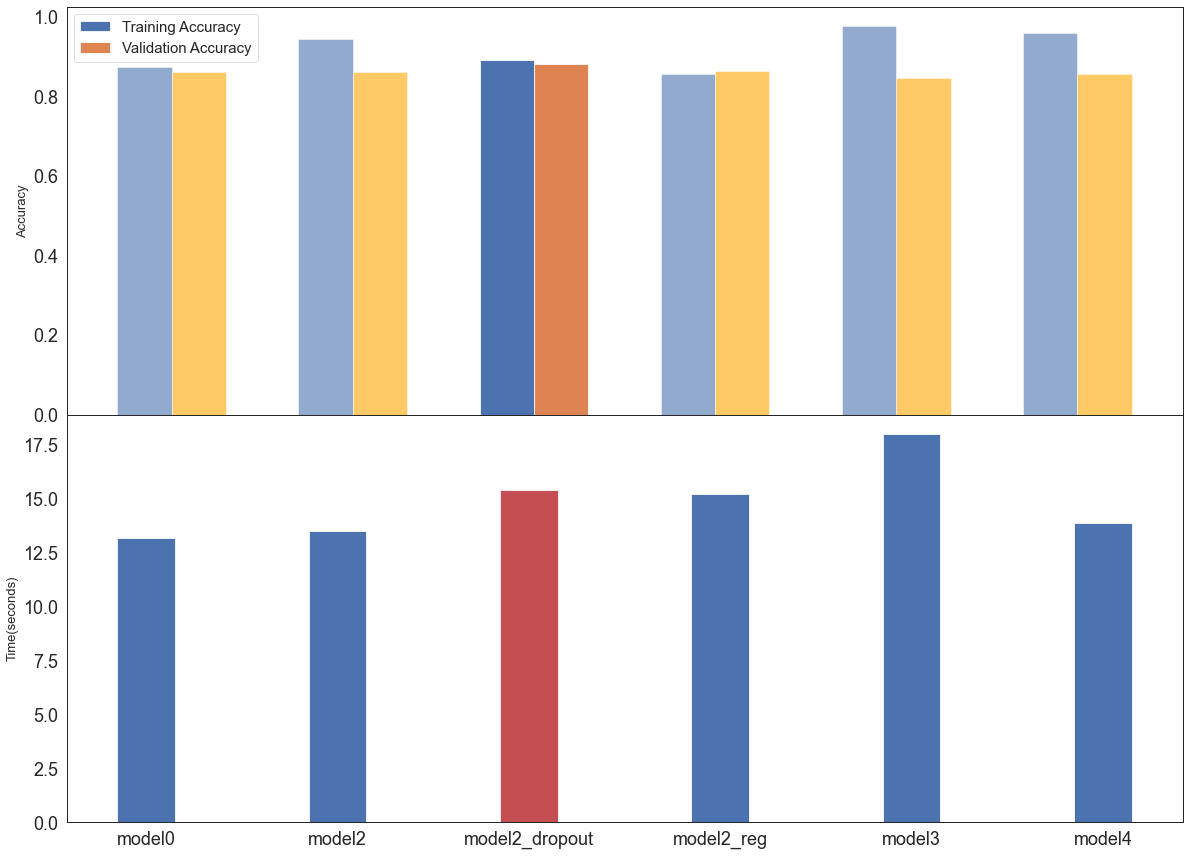

In [63]:
sns.set_style("white")

fig, ax = plt.subplots(nrows=2,ncols=1 ,figsize=(20,15))

plt.subplot(2,1,1)
plt
width = 0.3

plt.bar(dfr.index, dfr.Training_without, width, color='b', alpha=0.6)
plt.bar(dfr.index, dfr.Training_with, width, label = "Training Accuracy")

plt.bar(dfr.index+width, dfr.Val_without, width, color='orange', alpha=0.6)
plt.bar(dfr.index+width, dfr.Val_with, width, label = "Validation Accuracy")

plt.legend(loc="upper left", prop={'size': 15})
plt.tick_params(labelsize=18)

plt.ylabel("Accuracy", size = 13)
plt.subplot(2,1,2)

colors = ['b', 'b', 'r', 'b', 'b', 'b']
plt.bar(dfr.model, dfr.seconds, width, color=colors)

plt.subplots_adjust(hspace=.0)

plt.tick_params(labelsize=18)

plt.savefig('Results_Bar.png', bbox_inches='tight', pad_inches=0)


plt.ylabel("Time(seconds)", size = 13)